# Transformer-based deep learning models for the sentiment analysis of social media data

- The model implemented is derived from the above reserach paper

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np


import re
import nltk
from nltk.stem import WordNetLemmatizer


from transformers import AutoTokenizer, AutoModel
from torch.nn import functional as F
from transformers import BertTokenizer, BertModel

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

## Importing and Viewing first 5 of the Dataset

In [2]:
df = pd.read_csv('archive (1) 2/analyst_ratings_processed.csv')
# df = df[['stock', 'title']].copy().iloc[:1000]
df = df[['stock', 'title']].copy()

In [3]:
df.head(2)

,stock,title
0,A,Stocks That Hit 52-Week Highs On Friday
1,A,Stocks That Hit 52-Week Highs On Wednesday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   stock   1397891 non-null  object
 1   title   1400469 non-null  object
dtypes: object(2)
memory usage: 21.4+ MB


## Droping Duplicates in the review column

In [5]:
df = df.drop_duplicates(subset='title')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843225 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   843225 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Dropping Empty rows in DataFrame

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Converting all reviews to Lower Case

In [9]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [11]:
df.head(1)

,stock,title
0,a,stocks that hit 52-week highs on friday


## Removing \n tags

In [12]:
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [13]:
df.head(2)

,stock,title
0,a,stocks that hit 52-week highs on friday
1,a,stocks that hit 52-week highs on wednesday


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Removing HTML Tags

In [15]:
regex = re.compile(r'<[^>]+>')
def remove_html(string):
    return regex.sub('', string)
df['title']=df['title'].apply(lambda cw : remove_html(cw))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [17]:
df.head(1)

,stock,title
0,a,stocks that hit 52-week highs on friday


## Removing Special Characters

In [18]:
def remove_sc(string):
    return re.sub(r"[^a-zA-Z0-9 ]", "", string)

df['title']=df['title'].apply(lambda cw : remove_sc(cw))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [20]:
df.head(1)

,stock,title
0,a,stocks that hit 52week highs on friday


In [21]:
df['title'].describe()

count                       841148
unique                      839948
top       premarket news and views
freq                             4
Name: title, dtype: object

## Once more removing Duplicates

In [22]:
df = df.drop_duplicates(subset = "title")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839948 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   839948 non-null  object
 1   title   839948 non-null  object
dtypes: object(2)
memory usage: 19.2+ MB


## Lemmatization of reviews

In [24]:
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

df['title']=df['title'].apply(lambda cw : lemmatize(cw))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839948 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   839948 non-null  object
 1   title   839948 non-null  object
dtypes: object(2)
memory usage: 19.2+ MB


In [26]:
df.head(1)

,stock,title
0,a,stock that hit 52week high on friday


## Exploratory Data Analysis

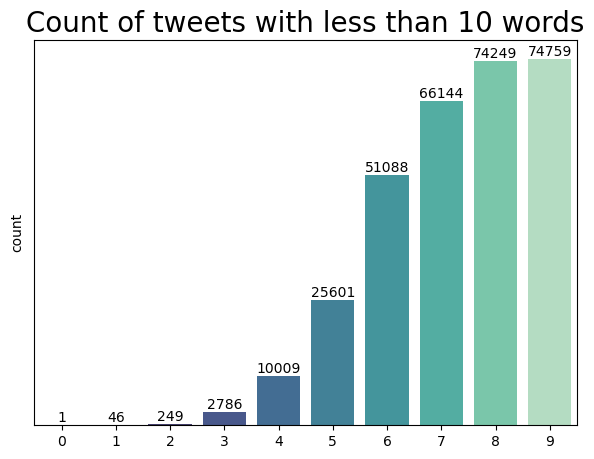

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

text_len = []
for text in df.title:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    
df['text_len'] = text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [28]:
df = df[df['text_len'] > 4] # Removing Texts with length less than 4

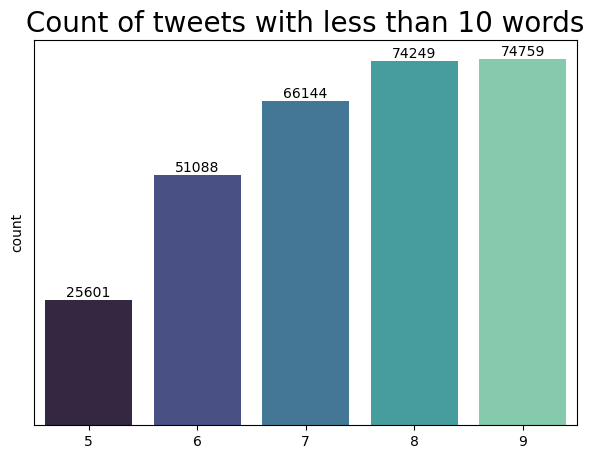

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

text_len = []
for text in df.title:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    
df['text_len'] = text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

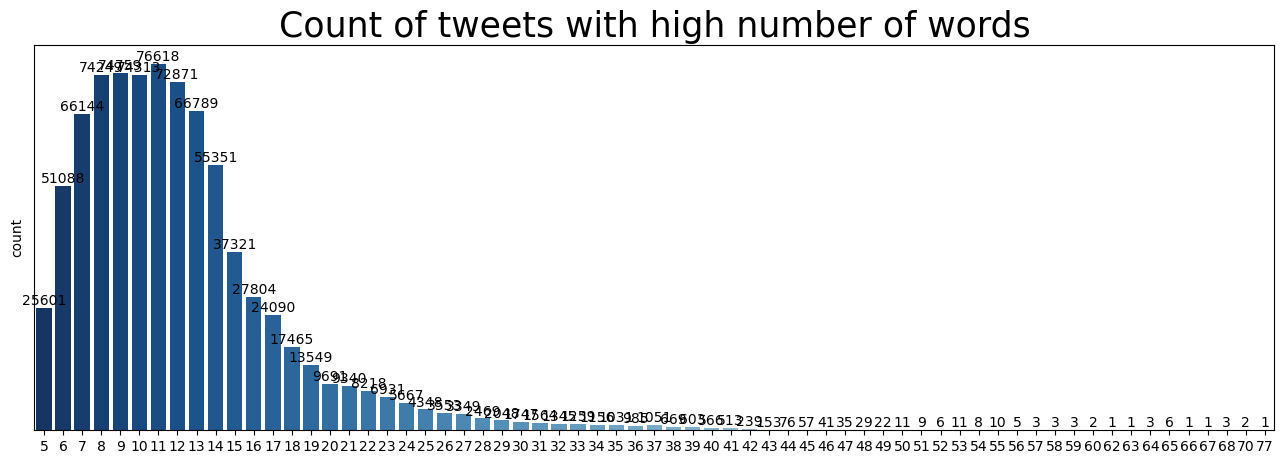

In [30]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>4)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [31]:
df = df[df['text_len'] <= 55] # Removing Texts with length greater than 55

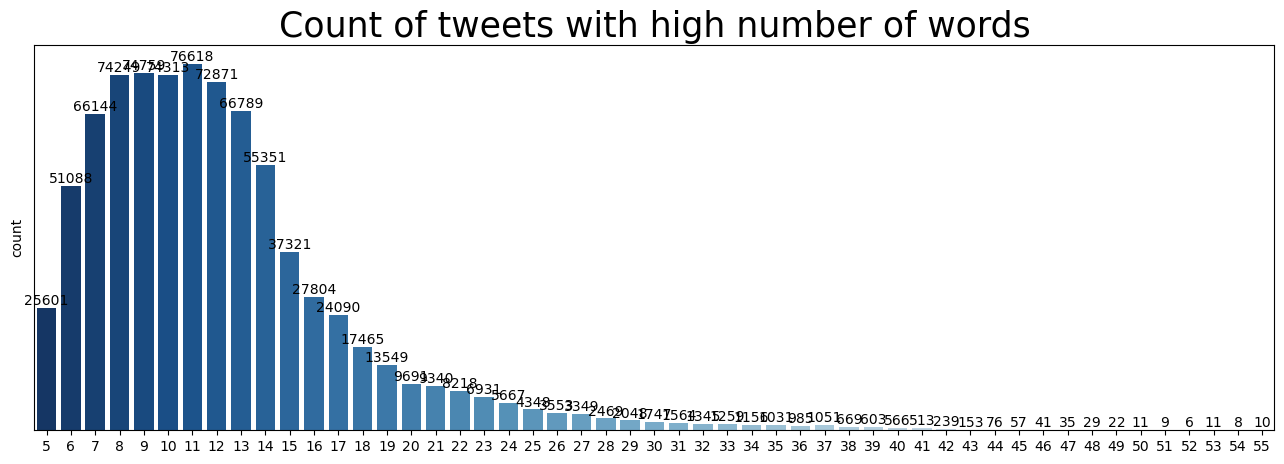

In [32]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>4)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826822 entries, 0 to 1400468
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   stock     826822 non-null  object
 1   title     826822 non-null  object
 2   text_len  826822 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ MB


## BERT Zero Shot

In [34]:
tokenizer = AutoTokenizer.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
model = AutoModel.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
labels = ['neutral', 'positive', 'negative']

def bert_zero_shot(sentence):
    inputs = tokenizer.batch_encode_plus([sentence] + labels,
                                     return_tensors='pt',
                                     pad_to_max_length=True)
    
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    output = model(input_ids, attention_mask=attention_mask)[0]
    sentence_rep = output[:1].mean(dim=1)
    label_reps = output[1:].mean(dim=1)
    
    similarities = F.cosine_similarity(sentence_rep, label_reps)
    closest = similarities.argsort(descending=True)
    
    return labels[closest[0]]

Some weights of the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis were not used when initializing RobertaModel: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a dow

In [35]:
%%time
df['emotion'] = df['title'].apply(lambda cw : bert_zero_shot(cw))

/Users/bhanuprasanna/anaconda3/envs/data_science/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2263: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


CPU times: user 9h 50min 51s, sys: 2h 20min 35s, total: 12h 11min 27s
Wall time: 5h 42min 45s


In [36]:
df.head()

,stock,title,text_len,emotion
0,a,stock that hit 52week high on friday,7,positive
1,a,stock that hit 52week high on wednesday,7,positive
2,a,71 biggest mover from friday,5,neutral
3,a,46 stock moving in friday midday session,7,negative
4,a,b of a security maintains neutral on agilent technology raise price target to 88,14,positive


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826822 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   stock     826822 non-null  object
 1   title     826822 non-null  object
 2   text_len  826822 non-null  int64 
 3   emotion   826822 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.5+ MB


In [37]:
df.to_csv('headlines_sentiment.csv', index = False, encoding='utf-8')

## BERT Tokenizer

### Input the Data which has been preprocessed

In [2]:
df = pd.read_csv('us_news_sentiment1.csv')
df.head(2)

,title,text_len,emotion
0,why share of chinese electric car maker nio are flying high today,12,positive
1,nio only consumer gainer workhorse group among loser,8,negative


In [3]:
df.drop(['text_len'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214205 entries, 0 to 214204
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    214205 non-null  object
 1   emotion  214205 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


### Using prajjwal1/bert-mini

In [5]:
model_name = "prajjwal1/bert-mini"

model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
inputs = tokenizer('I took my dog for a walk', return_tensors="pt",  padding='max_length', truncation=True, max_length=200)
# inputs = tokenizer('hello world', padding=True, truncation=True, return_tensors="pt")


input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']
outputs = model(input_ids, attention_mask=attention_mask)

In [8]:
outputs['pooler_output'].shape

torch.Size([1, 256])

In [6]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state
    input_mask_expanded = (
        attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    )
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(
        input_mask_expanded.sum(1), min=1e-9
    )

In [7]:
def get_embeddings(text_list):
    encoded_input = tokenizer(
        text_list, padding=True, truncation=True, return_tensors="pt"
    )
    encoded_input = {k: v for k, v in encoded_input.items()}
    with torch.no_grad():
        model_output = model(**encoded_input)
    return mean_pooling(model_output, encoded_input["attention_mask"])

In [8]:
sentences = df['title'].iloc[:50000].tolist()
# sentences = ["I took my dog for a walk",
#     "Today is going to rain",
#     "I took my cat for a walk",
#             ]
sen_emb = get_embeddings(sentences)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [9]:
sen_emb = [i.tolist() for i in sen_emb]

In [10]:
new_df = pd.DataFrame(sen_emb)
new_df.to_csv('Tensor_sentiment.csv', index = False, encoding='utf-8')

In [11]:
sen_emb[0][1]

1.174607753753662

In [3]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['emotion']= label_encoder.fit_transform(df['emotion'])

y = df['emotion'].iloc[:50000].tolist()

In [5]:
x = pd.read_csv('Tensor_sentiment.csv').values.tolist()

## Modelling

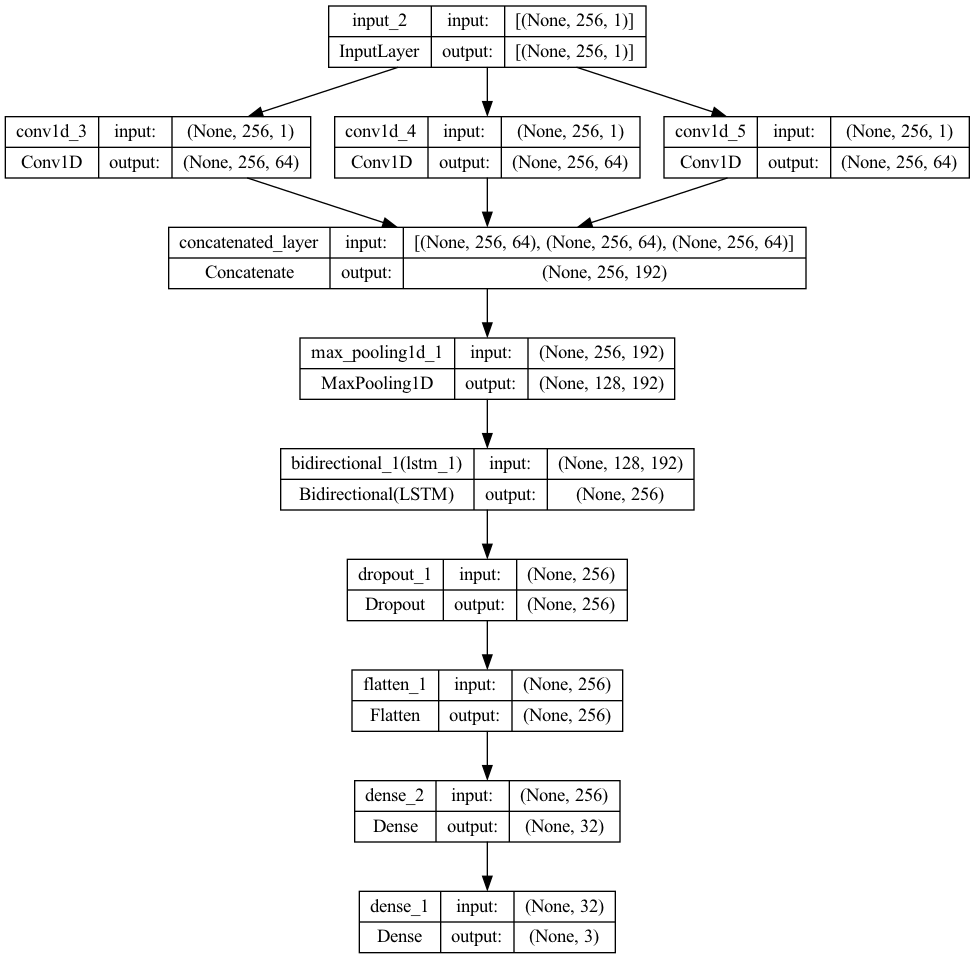

In [14]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, ZeroPadding2D, Dense, Conv1D, Concatenate, InputLayer
from tensorflow.keras.optimizers import Adagrad
from keras.utils import plot_model

input_img = Input(shape=(256,1), dtype='float32')
x1 = Conv1D(64, 3, activation='relu', dilation_rate=1, padding='same')(input_img)

# input_img2 = Input(shape=(256,1), dtype='float32')
x2 = Conv1D(64, 3, activation='relu', dilation_rate=2, padding='same')(input_img)

# input_img3 = Input(shape=(256,1), dtype='float32')
x3 = Conv1D(64, 3, activation='relu', dilation_rate=3, padding='same')(input_img) 



a_b = tf.keras.layers.Flatten()(tf.keras.layers.Dropout(0.2)
                               (tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))
                                (tf.keras.layers.MaxPooling1D(pool_size=2)
                                (concatenate([x1, x2, x3],name="concatenated_layer"))
                                )
                               )
                              )


output = Dense(3, activation=tf.nn.softmax)(Dense(32, activation='relu')(a_b))


model = Model([input_img], output)

plot_model(model,to_file='demo.png',show_shapes=True)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00005,
),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(x, y, epochs=30, batch_size=64)

Epoch 1/30


/Users/bhanuprasanna/anaconda3/envs/data_science/lib/python3.8/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-11-05 13:24:13.206095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 13:24:13.428074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 13:24:13.441407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 13:24:14.075003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-05 13:24:14.093133: I tensorflow/core/gr

782/782 [==============================] - 59s 73ms/step - loss: 0.9918 - accuracy: 0.4539
Epoch 2/30
782/782 [==============================] - 55s 70ms/step - loss: 0.9521 - accuracy: 0.4972
Epoch 3/30
782/782 [==============================] - 55s 71ms/step - loss: 0.8974 - accuracy: 0.5422
Epoch 4/30
782/782 [==============================] - 57s 73ms/step - loss: 0.8667 - accuracy: 0.5710
Epoch 5/30
782/782 [==============================] - 57s 72ms/step - loss: 0.8475 - accuracy: 0.5866
Epoch 6/30
782/782 [==============================] - 59s 76ms/step - loss: 0.8351 - accuracy: 0.5958
Epoch 7/30
782/782 [==============================] - 58s 75ms/step - loss: 0.8215 - accuracy: 0.6068
Epoch 8/30
782/782 [==============================] - 56s 71ms/step - loss: 0.8088 - accuracy: 0.6173
Epoch 9/30
782/782 [==============================] - 56s 72ms/step - loss: 0.8007 - accuracy: 0.6222
Epoch 10/30
782/782 [==============================] - 55s 71ms/step - loss: 0.7879 - accurac

In [17]:
model.save('model.h5')

In [18]:
import keras
m = keras.models.load_model('model.h5')

In [ ]:
model.fit(x, y, batch_size=64, validation_split=0.15, epochs=30, verbose='auto')

In [19]:
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 1)]     0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 256, 64)      256         ['input_2[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 256, 64)      256         ['input_2[0][0]']                
                                                                                                  
 conv1d_5 (Conv1D)              (None, 256, 64)      256         ['input_2[0][0]']                
                                                                                            

# Model Creation Practice

In [13]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, ZeroPadding2D, Dense, Conv1D, Concatenate, InputLayer
from tensorflow.keras.optimizers import Adagrad
from keras.utils import plot_model

input_img = Input(shape=(256,1))
x1 = Conv1D(64, 3, activation='relu', dilation_rate=1, padding='same')(input_img)

# input_img2 = Input(shape=(256,1))
x2 = Conv1D(64, 3, activation='relu', dilation_rate=2, padding='same')(input_img)

# input_img3 = Input(shape=(256,1))
x3 = Conv1D(64, 3, activation='relu', dilation_rate=3, padding='same')(input_img) 

# Concatenate works as layers have same size output
# x4 = Concatenate()([x1,x2,x3])

# x4 = tf.keras.layers.MaxPooling1D(pool_size=2)(Concatenate()([x1,x2,x3]))
# Dense(18, activation='relu')(output)

x4 = tf.keras.layers.Flatten()(tf.keras.layers.Dropout(0.2)
                               (tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))
                                (tf.keras.layers.MaxPooling1D(pool_size=2)
                                (concatenate([x1,x2,x3]))
                                )
                               )
                              )


output = Dense(3, activation=tf.nn.softmax)(x4)

model = Model(inputs=[input_img], outputs=output)

model.summary()

2022-11-05 00:41:30.542110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-05 00:41:30.542429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 256, 64)      256         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 256, 64)      256         ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 256, 64)      256         ['input_1[0][0]']                
                                                            

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


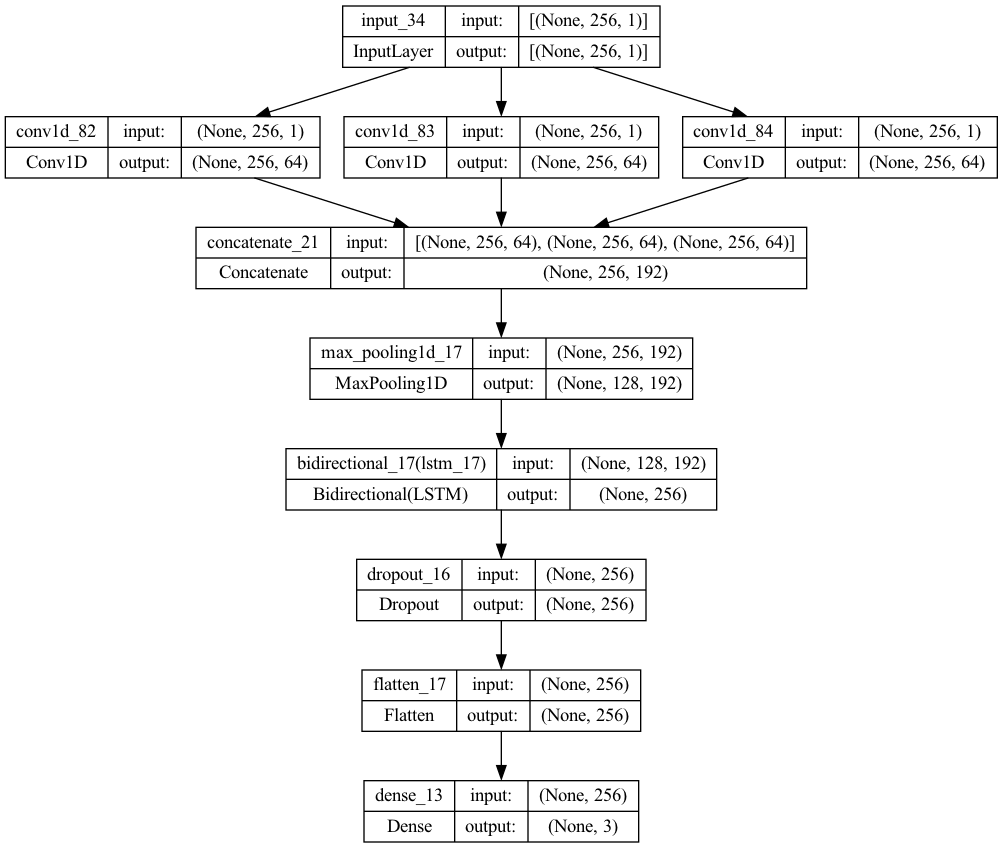

In [80]:
plot_model(model,to_file='demo.png',show_shapes=True)

In [ ]:
model.fit(sen_emb, y, epochs=10, verbose=1)

Model: "merged model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_a (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 a_layer_1 (Dense)              (None, 32, 32, 64)   128         ['Input_a[0][0]']                
                                                                                                  
 a_layer_2 (Dense)              (None, 32, 32, 128)  8320        ['a_layer_1[0][0]']              
                                                                                                  
 Input_b (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                       

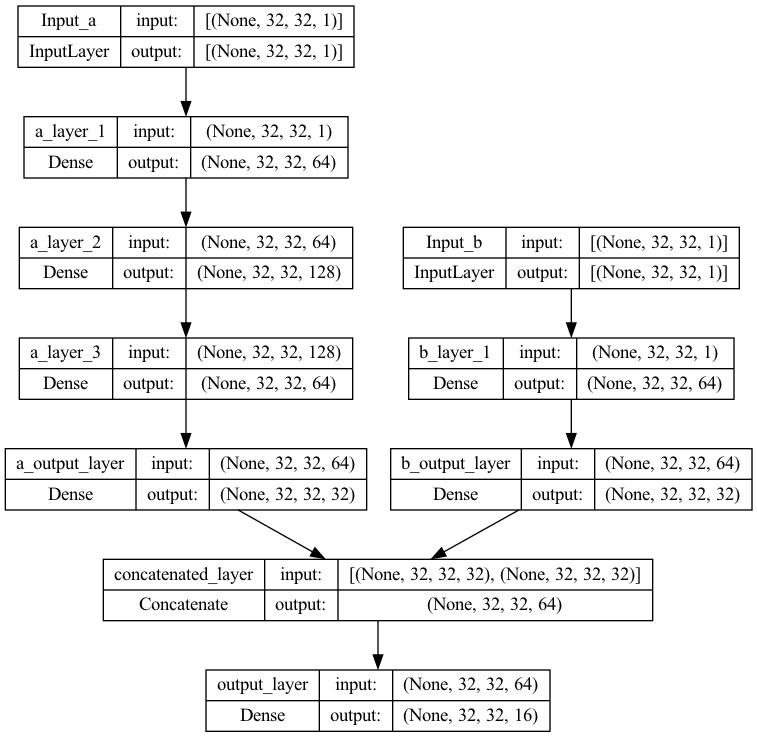

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Model A
a_ip_img = Input(shape=(32,32,1), name="Input_a")
al_1 = Dense(64, activation = "relu",name ="a_layer_1")(a_ip_img)
al_2 = Dense(128, activation="relu",name ="a_layer_2")(al_1)
al_3 = Dense(64, activation="relu",name ="a_layer_3")(al_2)
al_4 = Dense(32, activation="sigmoid",name ="a_output_layer")(al_3)

#Model B
b_ip_img = Input(shape=(32,32,1), name="Input_b")
bl_1 = Dense(64, activation="relu",name ="b_layer_1")(b_ip_img)
bl_2 = Dense(32, activation = "sigmoid",name ="b_output_layer")(bl_1)

#Merging model A and B
a_b = concatenate([al_4,bl_2],name="concatenated_layer")

#Final Layer
output_layer = Dense(16, activation = "sigmoid", name = "output_layer")(a_b)

#Model Definition 
merged = Model(inputs=[(a_ip_img,b_ip_img)],outputs=[output_layer], name = "merged model")

#Model Details
merged.summary()
keras.utils.plot_model(merged, "demo.png", show_shapes=True)